# Churn

## Goal:

- Discover drivers of churn in Telco
- Use drivers to develop programs to retain clients.

# Imports

In [1]:
import pandas as pd
from scipy import stats
import wrangle as acq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

from io import StringIO

# Acquire

- Data acquired from Codeup Database
- It contained 7043 rows and 31 columns before cleaning
- Each row represents a client from the customer database.
- Each column represents a feature of those customers

# Prepare

Prepare Actions:


Checked for nulls in the data
Removed rows with nulls
Split data into train test validate

In [2]:
# acquiring, cleaning, and adding features to data
df = acq.prep_telco()

#Split dataset into two components
X, Y = acq.split_my_data(df)

# splitting data into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

csv file found and loaded


## A brief look at the data

In [3]:
#all columns for the manipulated data, and first five values
X_train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes
5911,1,0,0,1
2479,0,0,1,0
5889,0,0,0,0
6087,1,0,0,0
785,0,0,0,0


## A summary of the data

In [4]:
#statistical values of original unmanipulated data that my data was derived from
df.describe()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.387903,0.592219,0.265370,0.209144,0.240664,0.439585,0.216669,0.216101,0.335794,0.228880
std,24.559481,30.090047,2266.794470,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.487307,0.491457,0.441561,0.406726,0.427517,0.496372,0.412004,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.6,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.9,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.9,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.0,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.9,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


## Explore

#### Answer the following initial questions:


H0: Gender has no impact on churn.

Ha: Gender does impact churn.

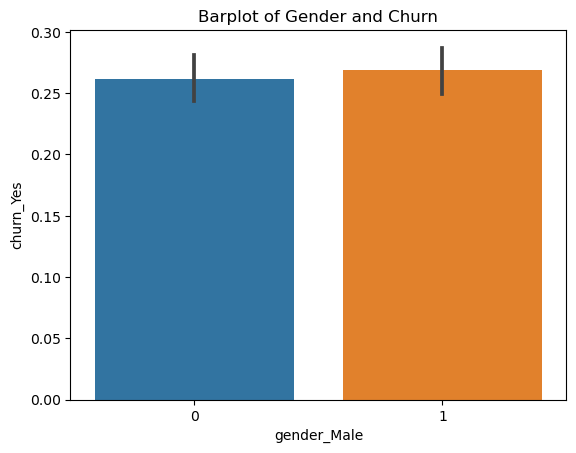

In [6]:
#visualization pulled from wrangle, comparing gender
acq.plot_gender_churn(X_train, y_train)

In [7]:
observed = pd.crosstab(X_train.gender_Male, y_train.churn_Yes)
observed
print()
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p is is greater than alpha at {p} therefore the relationship is not significant')


p is is greater than alpha at 0.6101126964282866 therefore the relationship is not significant


H0: Status as senior citizen does not effect churn.

Ha: Status as a senior citizen effects churn.

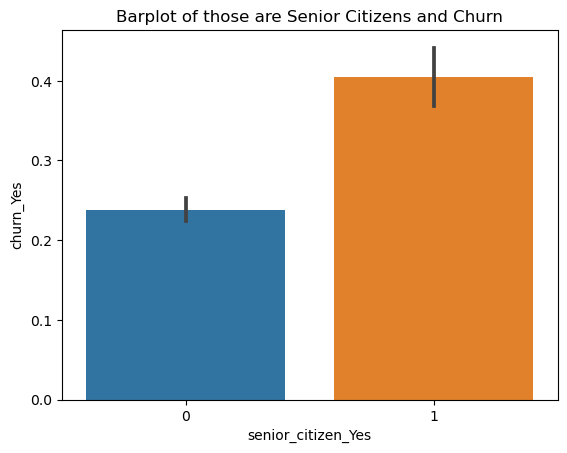

In [8]:
acq.plot_senior_citizen_Yes_churn(X_train, y_train)

In [9]:
observed = pd.crosstab(X_train.senior_citizen_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p is is less than alpha at {p} therefore the relationship is significant')

p is is less than alpha at 2.505662983276272e-19 therefore the relationship is significant


H0: Having a partner does not effect churn.

Ha: Having a partner effects churn.

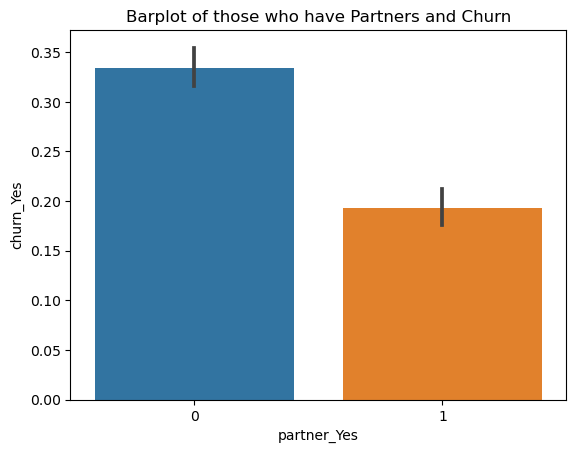

In [10]:
acq.plot_partner_Yes_churn(X_train, y_train)

In [11]:
observed = pd.crosstab(X_train.partner_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p is is less than alpha at {p} therefore the relationship is significant')

p is is less than alpha at 5.362120825511991e-25 therefore the relationship is significant


H0: Having dependents does not impact churn.

Ha: Having dependents does impact churn.

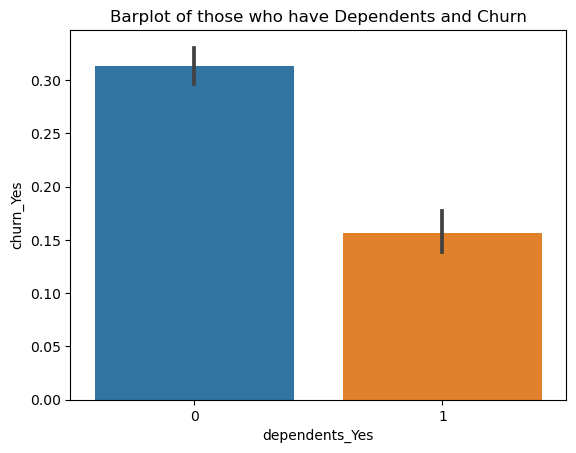

In [12]:
acq.plot_dependents_Yes_churn(X_train, y_train)

In [13]:
observed = pd.crosstab(X_train.dependents_Yes, y_train.churn_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p is is less than alpha at {p} therefore the relationship is significant')

p is is less than alpha at 4.0728740930257814e-26 therefore the relationship is significant


## Exploration Summary

    - Gender alone doesn't have a significant affect on churn
    - Senior citizenship status does impact churn
    - There is a stronger relationship between churn and whether the customers have children, and/or partners
    
## Modeling

    - I will use accuracy as my evaluation metric
    - My baseline accuracy was 73.4%
    
## Decision Tree

In [19]:
baseline_accuracy = (df.churn_Yes == 0).mean().round(5)
baseline_accuracy

0.73463

In [15]:
acq.train_validate_accuracy_dt(X_train, y_train, X_validate, y_validate)

for depth of    1, the train accuracy is 0.73467
for depth of    1, the validate accuracy is 0.73456

for depth of    2, the train accuracy is 0.73467
for depth of    2, the validate accuracy is 0.73456

for depth of    3, the train accuracy is 0.73467
for depth of    3, the validate accuracy is 0.73456



## Random Forest

In [16]:
baseline_accuracy = (y_train.churn_Yes == 0).mean()

In [17]:
acq.train_validate_accuracy_rf(X_train, y_train, X_validate, y_validate)

for depth of  1, the train accuracy is 0.73467
for depth of  1, the validate accuracy is 0.73456

for depth of  2, the train accuracy is 0.73467
for depth of  2, the validate accuracy is 0.73456

for depth of  3, the train accuracy is 0.73467
for depth of  3, the validate accuracy is 0.73456

for depth of  4, the train accuracy is 0.73467
for depth of  4, the validate accuracy is 0.73456



## KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_validate_pred = knn.predict(X_validate)
train_score =  knn.score(X_train, y_train)
validate_score = knn.score(X_validate, y_validate)
print(f'baseline_accuracy {baseline_accuracy}')
print(f'train_score {train_score}')
print(f'validate_score {validate_score}')

baseline_accuracy 0.7346745562130178
train_score 0.6589349112426035
validate_score 0.6479772888573456


## Comparing Models

DecisionTree and RandomForest were able to narrowly beat my baseline accuracy of 73.4

# Conclusions

### Exploration

Gender doesn't seem to be strongly associated with churn. There is a stronger relationship between churn and whether the customers are senior citizents, have children, and/or partners.

### Modeling

The final model was able to beat my baseline by a slim margin. 

### Recommendations 

Offer discounts to senior citizens to reduce churn, and family bundle discounts to fortify the lower churn rate of those with partners and dependents.

### Next Steps

Do additional analysis comparing combinations of features to find the highest combinations of churn.